# Titanic: Machine Learning from Disaster

## Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

## Objective

Predict what sorts of people were likely to survive.

Inspiration:
   - https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
   - https://www.kaggle.com/poonaml/titanic/titanic-survival-prediction-end-to-end-ml-pipeline
   - https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial
   - https://www.kaggle.com/arthurlu/titanic/exploratory-tutorial-titanic

## Table of contents


- [Description of the data set](#Description-of-the-data-set)
- [First look at the data](#First-look-at-the-data)
    - [Import Libraries](#Import-Libraries)
    - [Load Data](#Load-Data)
    - [Brief summaries](#Brief-summaries)
- [Visualization](#Visualization)
    - [Basic insight of the data](#Basic-insight-of-the-data)
    - [Focus on the mean of survival](#Focus-on-the-mean-of-survival)
- [Missing Values](#Missing-Values)
    - [Embarked](#Embarked)
    - [Fare](#Fare)
    - [Age with Median](#Age-with-median)
- [Features engineering](#Features-engineering)
    - [Name](#Name)
    - [Family](#Family)
    - [Name](#Name)
- [Visualization new Features](#Visualization-new-features)
    - [Visualization Name](#Visualization-Name)
    - [Visualization Family](#Visualization-Family)
- [Features Encoding](#Features-Encoding)
    - [Categorial features encoding](#Categorial features encoding)
        - [Label Encoding](#Label-Encoding)
        - [One Hot Encoding](#One-Hot-Encodingn)   
    - [Feature Scalling](#Feature-Scalling)
    - [Data Preparation](#Data-Preparation)
- [Features Importance](#Features-Importance)
    - [Correlation - Numerical label](#Correlation---Numerical-label)
    - [Correlation - One Hot Encoder](#Correlation---One-Hot-Encoder)
    - [LDA](#LDA)
    - [Select K Best](#Select-K-Best)
- [Model Selection](#Model-Selection)
    - [Helper function](#Helper-function)
    - [Gradient Boosting Classifier](#Gradient-Boosting-Classifier)
    - [Random Forest Classifier](#Random-Forest-Classifier)
    - [Adaboost](#Adaboost)
    - [SVC](#SVC)
    - [Logistic Regression](#Logistic-Regression)
    - [Voting Classifier](#Voting-Classifier)
- [Submission](#Submission)



- [Feature Selection](#Feature-selection)
- [Feature Selection](#Feature-selection)

### Description of the data set

## First look at the data

### Import Libraries

In [1]:
# Dataframe
import pandas as pd

# Visualization
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
sns.set_style('whitegrid')
%matplotlib inline

# Sklearn
import sklearn as sk
# Pipeline
from sklearn.pipeline import Pipeline
# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
# Features and model selection
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
# Metric
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier)

# Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning)

/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load data

In [2]:
# Load data directly into a dataframe
df_train=pd.read_csv("Data/Titanic/train.csv")
df_test=pd.read_csv("Data/Titanic/test.csv")

# Get a look at the first rows
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Variable Description
    - Survived: Survived (1) or died (0)
    - Pclass: Passenger's class
    - Name: Passenger's name
    - Sex: Passenger's sex
    - Age: Passenger's age
    - SibSp: Number of siblings/spouses aboard
    - Parch: Number of parents/children aboard
    - Ticket: Ticket number
    - Fare: Fare
    - Cabin: Cabin
    - Embarked: Port of embarkation
    
    Source of information : https://www.kaggle.com/c/titanic/data

### Brief summaries

In [4]:
print("----------------------------------Informations for the training set----------------------------------\n")
df_train.info()
print('\n',df_train.isnull().sum())
print("\n----------------------------------Informations for the testing set ----------------------------------\n")
df_test.info()
print('\n',df_test.isnull().sum())

----------------------------------Informations for the training set----------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----------------------------------Informations for the testing set -

Note that:
    - No Survived feature on the testing set
    - Cabin feature is mostly null --> Will be dropped
    - Embarked feature has a few missing values
    - Some Ages are missing --> Will need to be completed or drop the missing rows
    - Survived and Pclass should be treated as object because they are qualitative

In [5]:
# Dropping Cabin, Ticket and PassengerId
df_train=df_train.drop(['Cabin','PassengerId','Ticket'], axis=1)

df_test=df_test.drop(['Cabin','Ticket'], axis=1)
PassengerId = df_test['PassengerId']

In [6]:
# Changing the type of Pclass and Survived 
df_train['Pclass']=df_train['Pclass'].astype(object)
df_train['Survived']=df_train['Survived'].astype(object)

df_test['Pclass']=df_test['Pclass'].astype(object)

In [7]:
# Basic statistical information about quantitative and qualitative columns

print("----------------------------------Informations for the training set----------------------------------\n")
# Quantitative
display(df_train.describe())
# Qualitative
display(df_train.describe(include=['object']))
print("----------------------------------Informations for the testing set----------------------------------\n")
# Quantitative
display(df_test.describe())
# Qualitative
display(df_test.describe(include=['object']))

----------------------------------Informations for the training set----------------------------------



,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


,Survived,Pclass,Name,Sex,Embarked
count,891,891,891,891,889
unique,2,3,891,2,3
top,0,3,"Newell, Mr. Arthur Webster",male,S
freq,549,491,1,577,644


----------------------------------Informations for the testing set----------------------------------



,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188
std,120.810458,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


,Pclass,Name,Sex,Embarked
count,418,418,418,418
unique,3,418,2,3
top,3,"Caram, Mr. Joseph",male,S
freq,218,1,266,270


###  Visualization

#### Basic insight of the data

In [ ]:
# Qualitative Data : [Survived, Sex, Embarked, Pclass] 
fig, (axis1,axis2,axis3,axis4) = plt.subplots(1,4,figsize=(15,5))
sns.countplot(x='Survived', data=df_train, ax=axis1)
sns.countplot(x='Sex', data=df_train, ax=axis2)
sns.countplot(x='Embarked', data=df_train, ax=axis3)
sns.countplot(x='Pclass', data=df_train, ax=axis4)
fig.suptitle("Basic representation of Qualitative data with count")

In [ ]:
# Discrete Quantitative Data : [SibSp, Parch] 
fig2, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_train['SibSp'],ax=axis1)
sns.countplot(df_train['Parch'],ax=axis2)
fig2.suptitle("Basic representation of Discrete Quantitative data with count")

In [ ]:
# Continuous Quantitative Data : [Age, Fare]
fig3, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))
sns.distplot(df_train['Age'].dropna(), bins=80, ax=axis1)
sns.distplot(df_train['Fare'], ax=axis2)
fig3.suptitle("Basic representation of Continuous Quantitative data with probability")

In [ ]:
# Age distribution within Sex and Pclass
fig3, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(15,15))

# Age distribution
df_train.Age.plot(kind='kde',ax=axis1)
axis1.set_xlabel("Age")    
axis1.set_title("Age Distribution")

# Age distribution within Sex
df_train.Age[df_train.Sex == 'male'].plot(kind='kde',ax=axis2,)    
df_train.Age[df_train.Sex == 'female'].plot(kind='kde',ax=axis2)
axis2.set_xlabel("Age")    
axis2.set_title("Age Distribution within Sex")
axis2.legend(('Male', 'Female'))

# Age distribution within Pclass
df_train.Age[df_train.Pclass == 1].plot(kind='kde',ax=axis3)    
df_train.Age[df_train.Pclass == 2].plot(kind='kde',ax=axis3)
df_train.Age[df_train.Pclass == 3].plot(kind='kde',ax=axis3)
axis3.set_xlabel("Age")    
axis3.set_title("Age Distribution within Classes")
axis3.legend(('1st Class', '2nd Class','3rd Class'))

#### Focus on the mean of survival

In [ ]:
# [Sex, Pclass, Embarked] by mean of survival
fig4, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.barplot(x='Sex',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Embarked',y='Survived', data=df_train, ax=axis2)
sns.barplot(x='Pclass',y='Survived', data=df_train, ax=axis3)
fig4.suptitle("Representation of features linked to the target : Survived ")

In [ ]:
# [SibSp, Parch] by mean of survival
fig6, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='SibSp',y='Survived', data=df_train, ax=axis1)
sns.barplot(x='Parch',y='Survived', data=df_train, ax=axis2)
fig6.suptitle("Representation of features linked to the target : Survived ")

In [ ]:
# Cross relation betwen [Sex, Pclass, Embarked] by mean of survival
fig5, ((axis1,axis2),(axis3,axis4),(axis5,axis6)) = plt.subplots(3,2,figsize=(15,15))
sns.barplot(x='Sex',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Sex',y='Survived',hue='Embarked', data=df_train, ax=axis2)

sns.barplot(x='Pclass',y='Survived',hue='Sex', data=df_train, ax=axis3)
sns.barplot(x='Pclass',y='Survived',hue='Embarked', data=df_train, ax=axis4)

sns.barplot(x='Embarked',y='Survived',hue='Sex', data=df_train, ax=axis5)
sns.barplot(x='Embarked',y='Survived',hue='Pclass', data=df_train, ax=axis6)

fig5.suptitle("Cross Representation of the features linked to the target : Survived")

In [ ]:
# Age by mean of survival
fig=sns.barplot(x='Age', y='Survived', data=df_train)

In [ ]:
# Age

# Kernel density of survivor and non survivor by Age
g1 = sns.FacetGrid( df_train , hue='Survived' , aspect=4)
g1.map( sns.kdeplot , 'Age' , shade= True )
g1.add_legend()

# Kernel density of survivor and non survivor by Age and Sex 
g2 = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Sex')
g2.map( sns.kdeplot , 'Age' , shade= True )
g2.add_legend()

# Kernel density of survivor and non survivor by Age and Pclass
g3 = sns.FacetGrid( df_train , hue='Survived' , aspect=4 , row = 'Pclass')
g3.map( sns.kdeplot , 'Age' , shade= True )
g3.add_legend()

In [ ]:
# Fare

# Scatterplot Fare & Age
g = sns.FacetGrid(df_train, hue="Survived", size=6)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 550))

# Scatterplot Fare & Age by Sex
g = sns.FacetGrid(df_train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]),size=6)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 300))

# Scatterplot Fare & Age by Pclass
g = sns.FacetGrid(df_train, col="Pclass", hue="Survived", size=4)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.add_legend()
g.set(xlim=(0, 300))

# Scatterplot Fare & Age by Pclass & Sex
g = sns.FacetGrid(df_train, hue="Survived", col="Pclass", row="Sex" ,margin_titles=True,
                  palette={1:"red", 0:"grey"},size=5)
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.set(xlim=(0, 300))


### Features engineering

#### Combined DataFrame

In [8]:
# Creation of a dataframe with train and test for Feature Engineering
def get_combined_data():
    # reading train data
    train = pd.read_csv("Data/Titanic/train.csv")
    
    # reading test data
    test = pd.read_csv("Data/Titanic/test.csv")

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    #train.drop('Survived',axis=1,inplace=True)

    # merging train data and test data for future feature engineering
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',axis=1,inplace=True)
    
    return combined

def recover_train_test_target(combined):
    
    train0 = pd.read_csv("Data/Titanic/train.csv")
    
    targets = train0.Survived
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train,test,targets

In [9]:
combined = get_combined_data()

#### Name

In [10]:
# Name

#Create feature for the length of name 
combined["Name_Length"] = combined["Name"].apply(lambda x: len(x))

# Create a categorical feature Name_Size
combined['Name_Size']=pd.cut(combined['Name_Length']
                            ,bins=[0,20,40,60,90]
                            ,labels=["Short","Medium","Long","Very Long"])

# Extract the title from each name
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

# Map for aggregated titles
Title_Dictionary = {
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Master" :    "Master",
                    "Lady" :      "Royalty",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dona":       "Royalty",
                    "the Countess":"Royalty"
                    }
    
# Mapping
combined['Title_aggr'] = combined.Title.map(Title_Dictionary)

#### Family

In [11]:
# Family

# Creation of a feature Number_of_relatives = SibSp + Parch
combined['Number_of_relatives']=combined['SibSp']+combined['Parch']

# Creation of a categorical feature Size_Family
combined.loc[combined['Number_of_relatives'] == 0, 'Size_Family'] = 'Alone'
combined.loc[ (combined['Number_of_relatives'] > 0) 
            & (combined['Number_of_relatives'] < 4), 'Size_Family'] = 'Small'
combined.loc[combined['Number_of_relatives'] > 3, 'Size_Family'] = 'Big'

We can create 3 categories : 
    - Alone = 0
    - Small = [1,2,3]
    - Big = > 3

#### Cabin

In [53]:
# Mostly NaN values
combined.Cabin.isnull().sum()

1014

In [55]:
# Create a category Unknown
combined['Cabin'] = combined.Cabin.fillna( 'U' )

In [56]:
# Get the first letter
combined["Deck"]=combined.Cabin.str[0]
Sort_Deck=combined.groupby('Deck').size()
Sort_Deck.sort_values(ascending=False,inplace=True)
display(Sort_Deck)

Deck
U    1014
C    94  
B    65  
D    46  
E    41  
A    22  
F    21  
G    5   
T    1   
dtype: int64

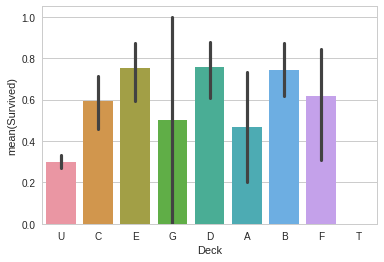

In [57]:
sns.barplot(x='Deck', y='Survived', data=combined)

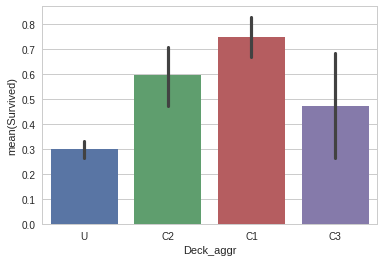

In [61]:
# Creation of 4 categories
Deck_Dictionary = {
                    "E":        "C1",
                    "D":       "C1",
                    "B":         "C1",
                    "C" :        "C2",
                    "F" :       "C2",
                    "G" :      "C3",
                    "A":       "C3",
                    "U":        "U"
                    }

# Mapping
combined['Deck_aggr'] = combined.Deck.map(Deck_Dictionary)

sns.barplot(x='Deck_aggr', y='Survived', data=combined)

In [65]:
Sort_Ticket=combined.groupby('Ticket').size()
Sort_Ticket.sort_values(ascending=False,inplace=True)
display(Sort_Ticket)

Ticket
CA. 2343             11
1601                 8 
CA 2144              8 
S.O.C. 14879         7 
PC 17608             7 
347082               7 
347077               7 
3101295              7 
382652               6 
19950                6 
347088               6 
113781               6 
4133                 5 
PC 17757             5 
113503               5 
W./C. 6608           5 
16966                5 
220845               5 
349909               5 
C.A. 34651           4 
C.A. 33112           4 
113760               4 
SC/Paris 2123        4 
2666                 4 
C.A. 2315            4 
36928                4 
W./C. 6607           4 
PC 17483             4 
LINE                 4 
230136               4 
                    .. 
349223               1 
349222               1 
349221               1 
349220               1 
349219               1 
349241               1 
349242               1 
349243               1 
349255               1 
350035               1 
350034   

In [71]:
combined['Ticket'].unique().size()

TypeError: 'int' object is not callable

In [76]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
def cleanTicket( ticket ):
    ticket = ticket.replace( '.' , '' )
    ticket = ticket.replace( '/' , '' )
    ticket = ticket.split()
    ticket = map( lambda t : t.strip() , ticket )
    ticket = list(filter( lambda t : not t.isdigit() , ticket ))
    if len( ticket ) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [78]:
ticket = pd.DataFrame()
# Extracting dummy variables from tickets:
combined[ 'Ticket_clean' ] = combined[ 'Ticket' ].map( cleanTicket )


Sort_Clean_Ticket=combined.groupby('Ticket_clean').size()
Sort_Clean_Ticket.sort_values(ascending=False,inplace=True)
display(Sort_Clean_Ticket)

Ticket_clean
XXX        957
PC         92 
CA         68 
A5         28 
SOTONOQ    24 
WC         15 
SCPARIS    14 
STONO      14 
A4         10 
FCC        9  
C          8  
SOC        8  
SOPP       7  
STONO2     7  
SCParis    5  
SCAH       5  
PP         4  
LINE       4  
WEP        4  
FC         3  
SOTONO2    3  
PPP        2  
SC         2  
SWPP       2  
SCA4       2  
AS         1  
AQ4        1  
AQ3        1  
SCA3       1  
CASOTON    1  
Fa         1  
LP         1  
SCOW       1  
SOP        1  
SP         1  
STONOQ     1  
A          1  
dtype: int64

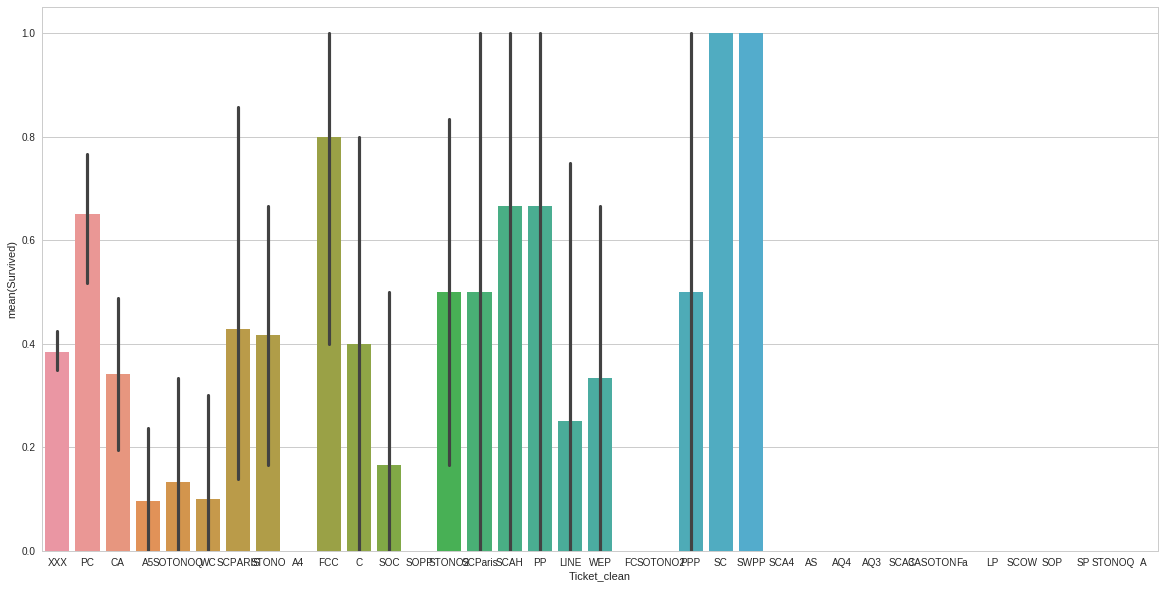

In [86]:
g = plt.figure(figsize=(20,10)) 
g = sns.barplot(x='Ticket_clean',data=combined, y='Survived',order=['XXX','PC','CA','A5','SOTONOQ','WC','SCPARIS','STONO','A4','FCC','C','SOC','SOPP','STONO2','SCParis','SCAH','PP','LINE','WEP','FC','SOTONO2','PPP','SC','SWPP','SCA4','AS','AQ4','AQ3','SCA3','CASOTON','Fa','LP','SCOW','SOP','SP','STONOQ','A'])

In [ ]:
# Creation of 4 categories
Ticket_Dictionary = {
                    "E":        "C1",
                    "D":       "C1",
                    "B":         "C1",
                    "C" :        "C2",
                    "F" :       "C2",
                    "G" :      "C3",
                    "A":       "C3",
                    "U":        "U"
                    }

# Mapping
combined['Ticket_aggr'] = combined.Deck.map(Ticket_Dictionary)

sns.barplot(x='Ticket_aggr', y='Survived', data=combined)

### Missing Values

#### Embarked

,Fare,Pclass,Embarked
61,80.0,1,NaN
829,80.0,1,NaN


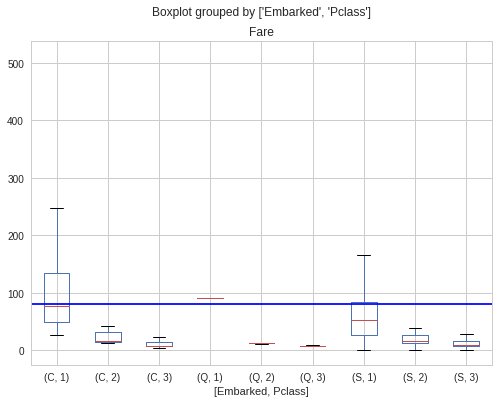

In [12]:
# Embarked

# Get the null rows where Embarked is null
display(combined[combined.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']])

# Embarked missing values
combined.boxplot(column='Fare', by=['Embarked','Pclass'], figsize=(8,6))
plt.axhline(y=80, color='blue')

# Remplace null values by C because most people who are Pclass 1 and Fare 80 has Embarked from C
combined = combined.set_value(combined.Embarked.isnull(), 'Embarked', 'C')

#### Fare

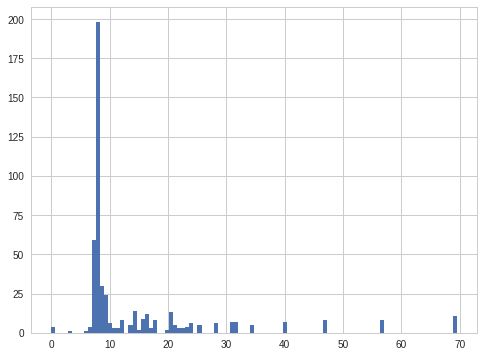

In [13]:
# Fare

# Visualization of the fare which is missing
combined[combined.Fare.isnull()][['Pclass', 'Fare', 'Embarked']]
#df_test[(df_test.Pclass==3)&(df_test.Embarked=='S')].Fare.hist(bins=100)
combined.loc[(combined['Pclass']==3) & (combined['Embarked']=='S')].Fare.hist(bins=100,figsize=(8,6))

# Get and affect the median to the missing value
Fare_median=combined[(combined.Pclass==3) & (combined.Embarked=='S')].Fare.median()
#df_test = df_test.set_value(df_test.Fare.isnull(), 'Fare', Fare_median)
combined["Fare"].fillna(Fare_median, inplace=True)

#### Age with median

In [14]:
# Simply fill the nan values with median using Sex, Pclass and Title
grouped = combined.groupby(['Sex','Pclass','Title_aggr'])
age_median = grouped['Age'].median()
display(age_median)
combined["Age"] = combined.groupby(['Sex','Pclass','Title_aggr'])['Age'].transform(lambda x: x.fillna(x.median()))

Sex     Pclass  Title_aggr
female  1       Miss          30.0
                Mrs           45.0
                Officer       49.0
                Royalty       39.0
        2       Miss          20.0
                Mrs           30.0
        3       Miss          18.0
                Mrs           31.0
male    1       Master         6.0
                Mr            41.5
                Officer       52.0
                Royalty       40.0
        2       Master         2.0
                Mr            30.0
                Officer       41.5
        3       Master         6.0
                Mr            26.0
Name: Age, dtype: float64

#### Verification of missing values

In [15]:
combined.isnull().sum()

Age                       0
Cabin                  1014
Embarked                  0
Fare                      0
Name                      0
Parch                     0
PassengerId               0
Pclass                    0
Sex                       0
SibSp                     0
Survived                418
Ticket                    0
Name_Length               0
Name_Size                 0
Title                     0
Title_aggr                0
Number_of_relatives       0
Size_Family               0
dtype: int64

#### Split for visualization

In [16]:
# Split
df_train, df_test, targets = recover_train_test_target(combined)

# Dropping Cabin, Ticket and PassengerId
df_train = df_train.drop(['Cabin','PassengerId','Ticket'], axis=1)
df_test = df_test.drop(['Cabin','Ticket'], axis=1)

In [17]:
df_train.shape

(891, 15)

In [18]:
df_train.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Name_Length', 'Name_Size', 'Title', 'Title_aggr',
       'Number_of_relatives', 'Size_Family'],
      dtype='object')

### Visualization new Features

#### Visualization Name

In [ ]:
# Vrack v1 a faire marcher
fig5, ((axis1,axis2),(axis3,axis4),(axis5,axis6),(axis7,axis8)) = plt.subplots(4,2,figsize=(15,15))

# Plot Name_Length
sns.countplot(x='Name_Length', data=df_train, ax=axis1)

# Plot Name_Length by mean of survival
sns.barplot(x='Name_Length', y='Survived', data=df_train, ax=axis2)

# Plot Name_Size by mean of survival
sns.barplot(x='Name_Size', data=df_train, order=["Short","Medium","Long","Very Long"], ax=axis3)

# Plot Name_Size by mean of survival
sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"], ax=axis4)

# Plot Title aggregate
sns.barplot(x='Title_aggr', data=df_train, ax=axis5)

# Display Title aggregate by mean of survival
sns.barplot(x='Title_aggr',y='Survived', data=df_train, ax=axis6)

# Display Title aggregate and Name Size by mean of survival
sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train, ax=axis7)

# Display Title aggregate and Name Size by mean of survival
sns.barplot(x='Name_Size',y='Survived', hue='Title_aggr', data=df_train, ax=axis8)

In [ ]:
# Vrack v2 a faire marcher
fig = plt.figure(figsize=(15, 5))
fig=sns.countplot(x='Name_Length', data=df_train)

fig=sns.barplot(x='Name_Length', y='Survived', data=df_train)

sns.barplot(x='Name_Size',y='Survived', data=df_train, order=["Short","Medium","Long","Very Long"])

# Display aggregate title by survived probability
fig1 = plt.figure(figsize=(15, 5))
fig1=sns.barplot(x='Title_aggr',y='Survived', data=df_train)

# Display aggregate title and Name Size by survived probability
fig2 = plt.figure(figsize=(15, 5))
fig2=sns.barplot(x='Title_aggr',y='Survived', hue='Name_Size', data=df_train)

# Display aggregate title and Name Size by survived probability
fig3 = plt.figure(figsize=(15, 5))
fig3=sns.barplot(x='Name_Size',y='Survived', hue='Title_aggr', data=df_train)

#### Visualization Family

In [ ]:
# A afficher correctrement
fig1 = plt.figure(figsize=(15, 5))
fig1 = sns.countplot(x='Number_of_relatives', data=df_train)

fig2 = plt.figure(figsize=(15, 5))
fig2 = sns.barplot(x='Number_of_relatives',y='Survived', data=df_train)

sns.barplot(x='Size_Family',y='Survived', data=df_train, order=['Alone', 'Small', 'Big'])

# Number_of_relatives with Pclass, Sex, Embarked by mean of survival
fig7, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Number_of_relatives',y='Survived',hue='Pclass', data=df_train, ax=axis1)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Sex', data=df_train, ax=axis2)
sns.barplot(x='Number_of_relatives',y='Survived',hue='Embarked', data=df_train, ax=axis3)
fig7.suptitle("Cross Representation of the features linked to the target : Survived")

# Size_Family with Pclass, Sex, Embarked by mean of survival
fig8, ((axis1),(axis2),(axis3)) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x='Size_Family',y='Survived',hue='Pclass', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis1,)
sns.barplot(x='Size_Family',y='Survived',hue='Sex', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis2)
sns.barplot(x='Size_Family',y='Survived',hue='Embarked', data=df_train, order=['Alone', 'Small', 'Big'], ax=axis3)
fig8.suptitle("Cross Representation of the features linked to the target : Survived")

### Features Encoding

In [ ]:
display(combined.columns)
display(combined.isnull().sum())
display(combined.shape)
display(combined[["Embarked","Sex","Title_aggr","Size_Family","Name_Size","Pclass"]].head())

#### Categorial features encoding

##### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

# Dataframe with numerical categorical feature
combined_num_cat = pd.DataFrame()

# LabelEncoder
labelEnc = LabelEncoder()

# Columns to apply
cat_vars=["Embarked","Sex","Title_aggr","Size_Family","Name_Size"]

for col in cat_vars:
    labelEnc.fit(np.unique(list(combined[col].values)))
    combined_num_cat[col]=labelEnc.transform(combined[col].astype('str'))
    
labelEnc.fit(np.unique(list(combined["Pclass"].values)))
combined_num_cat["Pclass"]=labelEnc.transform(combined["Pclass"].astype('int'))

In [20]:
combined_num_cat.head()

,Embarked,Sex,Title_aggr,Size_Family,Name_Size,Pclass
0,2,1,2,2,1,2
1,0,0,3,2,0,0
2,2,0,1,0,1,2
3,2,0,3,2,0,0
4,2,1,2,0,1,2


##### One Hot  Encoding

In [21]:
def one_hot(df_in, cols):
    df_out = pd.DataFrame()
    for each in cols:
        dummies = pd.get_dummies(df_in[each], prefix=each, drop_first=False)
        df_out = pd.concat([df_out, dummies], axis=1)
    return df_out

In [22]:
# Dataframe with binary categorical feature

# Columns to apply
cat_vars=['Embarked','Sex',"Title_aggr","Size_Family","Name_Size","Pclass"]
combined_One_Hot_Cat = one_hot(combined,cat_vars)

In [23]:
combined_One_Hot_Cat.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title_aggr_Master,Title_aggr_Miss,Title_aggr_Mr,Title_aggr_Mrs,Title_aggr_Officer,...,Size_Family_Alone,Size_Family_Big,Size_Family_Small,Name_Size_Short,Name_Size_Medium,Name_Size_Long,Name_Size_Very Long,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


### Feature Scalling

In [24]:
combined[['Fare','Age','Name_Length','Number_of_relatives']].head()

,Fare,Age,Name_Length,Number_of_relatives
0,7.2500,22.0,23,1
1,71.2833,38.0,51,1
2,7.9250,26.0,22,0
3,53.1000,35.0,44,1
4,8.0500,35.0,24,0


In [25]:
from sklearn import preprocessing

std_columns = ['Fare','Age']

combined_num_std = pd.DataFrame(combined[std_columns])

# StandardScaller process
std_scale = preprocessing.StandardScaler()
combined_num_std[std_columns] = std_scale.fit_transform(combined[std_columns].astype(float))

combined_num_std[std_columns].head()

,Fare,Age
0,-0.503176,-0.541471
1,0.734809,0.648868
2,-0.490126,-0.243886
3,0.383263,0.425680
4,-0.487709,0.425680


### Data Preparation

In [26]:
# Concat
combined_OH_Std = pd.concat([combined_num_std,combined_One_Hot_Cat],axis=1)
combined_Num_Std = pd.concat([combined_num_std,combined_num_cat],axis=1)

In [27]:
# Display shape
display(combined_OH_Std.shape)
display(combined_Num_Std.shape)

(1309, 23)

(1309, 8)

In [28]:
# Split into Train and Eval
Train_OH_Std, Eval_OH_Std, Target_OH_Std = recover_train_test_target(combined_OH_Std)
Train_Num_Std, Eval_Num_Std, Target_Num_Std = recover_train_test_target(combined_Num_Std)

In [29]:
# Display shape
display(Train_OH_Std.shape)
display(Eval_OH_Std.shape)
display(Target_OH_Std.shape)

(891, 23)

(418, 23)

(891,)

In [30]:
# Select Data
data = Train_OH_Std
test_data = Eval_OH_Std
target = Target_OH_Std
columns_name = list(Train_OH_Std)

# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

# Dataframe of prediction
Prediction = pd.DataFrame()

pd.set_option('display.max_colwidth', -1)

### Features Importance


#### Correlation - Numerical label

In [31]:
# Concant data and target
Features_with_target = pd.concat([Train_Num_Std,target],axis=1)
# Correlation with target
Corr = pd.DataFrame()
Corr['Corr'] = Features_with_target.corr()["Survived"]
Corr.sort_values('Corr',ascending=False,inplace=True)
display(Corr)
# A réfléchir au sens en regardant la formule de corr pour les catégories le numerical label ordinales et non ordinales

,Corr
Survived,1.000000
Fare,0.257307
Size_Family,0.249714
Age,-0.059594
Title_aggr,-0.062916
Embarked,-0.174199
Name_Size,-0.261576
Pclass,-0.338481
Sex,-0.543351


#### Correlation - One Hot Encoder

In [32]:
# Concant data and target
Features_with_target = pd.concat([Train_OH_Std,target],axis=1)
# Correlation with target
Corr = pd.DataFrame()
Corr['Corr'] = Features_with_target.corr()["Survived"]
Corr.sort_values('Corr',ascending=False,inplace=True)
display(Corr)

,Corr
Survived,1.000000
Sex_female,0.543351
Title_aggr_Mrs,0.344935
Title_aggr_Miss,0.332795
Pclass_1,0.285904
Size_Family_Small,0.279855
Name_Size_Long,0.273448
Fare,0.257307
Embarked_C,0.174718
Pclass_2,0.093349


#### LDA

In [33]:
# LDA
# LDA with n = 2 solver svd --> score : 0.78947
lda = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lda.fit(X_train, y_train)

y_train_pred_lda = lda.predict(X_train)
y_test_pred_lda = lda.predict(X_test)

lda_acc = accuracy_score(y_test, y_test_pred_lda)
lda_cr= classification_report(y_test, y_test_pred_lda)
lda_cm = confusion_matrix(y_test, y_test_pred_lda)

lda_acc_train = accuracy_score(y_train, y_train_pred_lda)
lda_cr_train = classification_report(y_train, y_train_pred_lda)
lda_cm_train = confusion_matrix(y_train, y_train_pred_lda)

print("Training set")
print( "LDA Accuracy :", lda_acc_train)
print(lda_cr_train)
print("Confusion Matrix :\n",lda_cm_train)
#print('Explained variance ratio :',lda.explained_variance_ratio_)
print('Balance of classes',lda.priors_)

print("-----------------------------------------------------------------------------")
print("Testing set")
print( "LDA Accuracy :", lda_acc)
print(lda_cr)
print("Confusion Matrix :\n",lda_cm)
#print('Explained variance ratio :',lda.explained_variance_ratio_)
print('Balance of classes',lda.priors_)



Prediction['LDA'] = lda.predict(Eval_OH_Std)


Coef = pd.DataFrame()
Coef['Features'] = list(X_train.columns)
Coef['Coef'] = lda.coef_.transpose()
Coef.sort_values('Coef',ascending=False,inplace=True)
Coef

Training set
LDA Accuracy : 0.830056179775
             precision    recall  f1-score   support

          0       0.84      0.89      0.86       430
          1       0.82      0.73      0.77       282

avg / total       0.83      0.83      0.83       712

Confusion Matrix :
 [[384  46]
 [ 75 207]]
Balance of classes [ 0.60393258  0.39606742]
-----------------------------------------------------------------------------
Testing set
LDA Accuracy : 0.837988826816
             precision    recall  f1-score   support

          0       0.88      0.87      0.88       119
          1       0.75      0.77      0.76        60

avg / total       0.84      0.84      0.84       179

Confusion Matrix :
 [[104  15]
 [ 14  46]]
Balance of classes [ 0.60393258  0.39606742]


/home/jules/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,Features,Coef
7,Title_aggr_Master,3.313311
12,Title_aggr_Royalty,1.478327
5,Sex_female,1.386251
20,Pclass_1,1.228448
10,Title_aggr_Mrs,0.668010
19,Name_Size_Very Long,0.664855
13,Size_Family_Alone,0.664218
18,Name_Size_Long,0.425577
2,Embarked_C,0.202758
0,Fare,0.181362


#### Features importance


In [34]:
list(data.columns)

['Fare',
 'Age',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex_female',
 'Sex_male',
 'Title_aggr_Master',
 'Title_aggr_Miss',
 'Title_aggr_Mr',
 'Title_aggr_Mrs',
 'Title_aggr_Officer',
 'Title_aggr_Royalty',
 'Size_Family_Alone',
 'Size_Family_Big',
 'Size_Family_Small',
 'Name_Size_Short',
 'Name_Size_Medium',
 'Name_Size_Long',
 'Name_Size_Very Long',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

#### Anova

In [35]:
# Select K Best 
from sklearn.feature_selection import SelectKBest,f_classif,chi2,SelectFpr,SelectFdr

# Perform feature selection
selector_anova = SelectKBest(f_classif, k="all")
#selector_chi2 = SelectKBest(chi2, k="all")

selector_anova.fit(data, target)
#selector_chi2.fit(data, target)

SelectKBest(k='all', score_func=<function f_classif at 0x7f08718f1d08>)

In [36]:
# Get and display result
result_selector = pd.DataFrame()
result_selector['feature'] = list(data.columns)
result_selector['Anova score'] = selector_anova.scores_
result_selector['Anova pval'] = selector_anova.pvalues_
result_selector.sort_values('Anova score',ascending=False,inplace=True)
result_selector

,feature,Anova score,Anova pval
9,Title_aggr_Mr,383.945495,2.428783e-71
5,Sex_female,372.405724,1.406066e-69
6,Sex_male,372.405724,1.406066e-69
10,Title_aggr_Mrs,120.057834,2.705436e-26
8,Title_aggr_Miss,110.722014,1.745276e-24
22,Pclass_3,103.057599,5.510281e-23
20,Pclass_1,79.136403,3.190582e-18
15,Size_Family_Small,75.541509,1.702390e-17
18,Name_Size_Long,71.845856,9.592044e-17
0,Fare,63.030764,6.120189e-15


### Drop some features

In [37]:
data.drop(['Title_aggr_Royalty','Title_aggr_Officer','Name_Size_Medium','Embarked_Q'],axis=1,inplace=True)
test_data.drop(['Title_aggr_Royalty','Title_aggr_Officer','Name_Size_Medium','Embarked_Q'],axis=1,inplace=True)

/home/jules/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/jules/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
display(data.shape)
test_data.shape

(891, 19)

(418, 19)

In [39]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

### Model Selection

#### Helper function

In [40]:
# Helper function to analyse and get result

# Plot the confusion matrice 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Grid Score into a Pandas Dataframe
def cv_results_to_df(cv_results):
    """
    Convert a sklearn.model_selection.GridSearchCV.cv_results_ attribute to a tidy
    pandas DataFrame where the output is filtered with only mean std and params.
    """
    df=pd.DataFrame.from_dict(cv_results)
    df=df[['mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
    df.sort_values('mean_test_score',ascending=False,inplace=True)
    return df

# Helper function for gridseach
def grid_search_global(clas_reg, dict_pip, dict_param, class_names):

    dict_of_res={}
    dict_of_best={}
    df_results_global=pd.DataFrame()
    
    print ("Starting Gridsearch")
    
    for key in dict_param.keys():
        gs = GridSearchCV(dict_pip[key], dict_param[key], verbose=0, refit=True, n_jobs=-1, cv=5)
        gs = gs.fit(X_train, y_train)
        dict_of_res[key]=gs.grid_scores_
        
        print('\n-------------------------------------------------------------------------------------------------------')
        print ("Gridsearch for %s \n" % dict_param[key])
        print ("Best score :", gs.best_score_)
        print ("Best params :",gs.best_params_)
        dict_of_best[key]=[gs.best_score_,gs.best_params_]
        
        y_train_pred=gs.predict(X_train)
        y_test_pred=gs.predict(X_test)
        
        if (clas_reg=='clas'):
            
            # Classification report
            print('\nClassification report on training set')
            print(classification_report(y_train, y_train_pred))
            print('\nClassification report on testing set')
            print(classification_report(y_test, y_test_pred))
            
            # Compute confusion matrix
            #cnf_matrix = confusion_matrix(y_test, y_test_pred)
            #np.set_printoptions(precision=2)

            # Plot non-normalized confusion matrix
            #plt.figure()
            #plot_confusion_matrix(cnf_matrix, classes=class_names,
            #                      title='Confusion matrix, without normalization')
            
            # Plot normalized confusion matrix
            #plt.figure()
            #plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
            #                      title='Normalized confusion matrix')
            
            #plt.show()
        
        # Resultats deja présent dans : Grid Score #cv_results_ alégé
        #print('\nGrid Score #grid_scores_')
        #pprint(gs.grid_scores_)
        
        # Obtention des résultats avec selection et réarrangement des attributs puis stockage
        df_results=cv_results_to_df(gs.cv_results_)
        df_results['Algo']=key
        df_results=df_results[['Algo','mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score', 'params']]
        df_results_global=df_results_global.append(df_results)
        print("\nGrid Score #cv_results_ alégé")
        display(df_results)
        

        
    # Transformation de dict_of_best en dataframe
    df_best=pd.DataFrame.from_dict(dict_of_best,'index')
    df_best.columns=['Scores','Parameters']
    df_best.sort_values('Scores',ascending=False,inplace=True)  

    print('\n -------------------------------------------------------------------------------------------------------')
    print('\nList of best score and parameters by pipeline')
    display(df_best)
    print('\nSummary')
    display(df_results_global)
    print ("Gridsearch Finished")
    print('\n -------------------------------------------------------------------------------------------------------')    
    return df_best, dict_of_best, df_results_global


"""
========================
Plotting Learning Curves
========================
On the left side the learning curve of a naive Bayes classifier is shown for
the digits dataset. Note that the training score and the cross-validation score
are both not very good at the end. However, the shape of the curve can be found
in more complex datasets very often: the training score is very high at the
beginning and decreases and the cross-validation score is very low at the
beginning and increases. On the right side we see the learning curve of an SVM
with RBF kernel. We can see clearly that the training score is still around
the maximum and the validation score could be increased with more training
samples.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(0.7, 1)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, estimator_name, param_name, param_range, X, y, cv,
    scoring='accuracy', scale='classic' , n_jobs=-1):
    
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    title_fig='Validation Curve with %s' % estimator_name
    plt.title(title_fig)
    plt.xlabel(param_name)
    plt.ylabel("Score : %s" % scoring)
    plt.ylim(0.7, 1)
    lw = 2
    
    if (scale=='semilog'):
        plt.semilogx(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw)
    else :
        plt.plot(param_range, train_scores_mean, label="Training score",
                     color="darkorange", lw=lw)
        plt.fill_between(param_range, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.2,
                         color="darkorange", lw=lw)
        plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                     color="navy", lw=lw)
        plt.fill_between(param_range, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.2,
                         color="navy", lw=lw) 

    plt.legend(loc="best")
    plt.show()
    





Plotting Learning Curves
On the left side the learning curve of a naive Bayes classifier is shown for
the digits dataset. Note that the training score and the cross-validation score
are both not very good at the end. However, the shape of the curve can be found
in more complex datasets very often: the training score is very high at the
beginning and decreases and the cross-validation score is very low at the
beginning and increases. On the right side we see the learning curve of an SVM
with RBF kernel. We can see clearly that the training score is still around
the maximum and the validation score could be increased with more training
samples.



### Multipes Algo

In [ ]:
# Pipeline setup
models = { 
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

# Parameters setup
params = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'RandomForestClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35] },
    'GradientBoostingClassifier': { 'n_estimators': [5, 10, 15, 20, 25, 30, 35], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

### Gradient Boosting Classifier

In [ ]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

In [41]:
# Pipeline setup
models = { 
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

# Parameters setup
params = {
    'GradientBoostingClassifier': { 'n_estimators': [ 5,10,15,20,25,30,35,40], 
                                   'learning_rate': [0.01,0.03,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
                                  'loss' : ['deviance','exponential'],
                                  'max_depth' : [3,4,5,6,7,8,9],
                                   'min_samples_split': [2,3,4,5,6,7,8,9],
                                   'min_samples_leaf' : [1,2,3,4,5,6],
                                   'max_features' : np.range(4,19,2)
                                  }
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

Starting Gridsearch

-------------------------------------------------------------------------------------------------------
Gridsearch for {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40], 'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3], 'loss': ['deviance', 'exponential'], 'max_depth': [2, 3, 4]} 

Best score : 0.845505617978
Best params : {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 40}

Classification report on training set
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       433
          1       0.96      0.89      0.92       279

avg / total       0.94      0.94      0.94       712


Classification report on testing set
             precision    recall  f1-score   support

          0       0.82      0.88      0.85       116
          1       0.75      0.65      0.69        63

avg / total       0.80      0.80      0.80       179


Grid Score #cv_results_ alégé


,Algo,mean_test_score,std_test_score,mean_train_score,std_train_score,params
191,GradientBoostingClassifier,0.845506,0.027068,0.936795,0.004488,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 40}"
167,GradientBoostingClassifier,0.845506,0.034211,0.950848,0.003614,"{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 40}"
94,GradientBoostingClassifier,0.844101,0.034065,0.873955,0.010638,"{'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 35}"
236,GradientBoostingClassifier,0.844101,0.028505,0.934689,0.002623,"{'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 25}"
115,GradientBoostingClassifier,0.844101,0.033609,0.887638,0.007327,"{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 20}"
190,GradientBoostingClassifier,0.842697,0.023450,0.930122,0.006069,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 35}"
164,GradientBoostingClassifier,0.842697,0.033841,0.930484,0.006739,"{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 25}"
71,GradientBoostingClassifier,0.842697,0.031450,0.876054,0.007974,"{'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 40}"
183,GradientBoostingClassifier,0.841292,0.027395,0.900641,0.008758,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}"
237,GradientBoostingClassifier,0.841292,0.029013,0.943114,0.005768,"{'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 30}"



 -------------------------------------------------------------------------------------------------------

List of best score and parameters by pipeline


,Scores,Parameters
GradientBoostingClassifier,0.845506,"{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 40}"



Summary


,Algo,mean_test_score,std_test_score,mean_train_score,std_train_score,params
191,GradientBoostingClassifier,0.845506,0.027068,0.936795,0.004488,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 40}"
167,GradientBoostingClassifier,0.845506,0.034211,0.950848,0.003614,"{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 40}"
94,GradientBoostingClassifier,0.844101,0.034065,0.873955,0.010638,"{'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 35}"
236,GradientBoostingClassifier,0.844101,0.028505,0.934689,0.002623,"{'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 25}"
115,GradientBoostingClassifier,0.844101,0.033609,0.887638,0.007327,"{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 20}"
190,GradientBoostingClassifier,0.842697,0.023450,0.930122,0.006069,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 35}"
164,GradientBoostingClassifier,0.842697,0.033841,0.930484,0.006739,"{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 25}"
71,GradientBoostingClassifier,0.842697,0.031450,0.876054,0.007974,"{'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 40}"
183,GradientBoostingClassifier,0.841292,0.027395,0.900641,0.008758,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}"
237,GradientBoostingClassifier,0.841292,0.029013,0.943114,0.005768,"{'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 30}"


Gridsearch Finished

 -------------------------------------------------------------------------------------------------------


In [42]:
# Results dataframe
d_res

,Algo,mean_test_score,std_test_score,mean_train_score,std_train_score,params
191,GradientBoostingClassifier,0.845506,0.027068,0.936795,0.004488,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 40}"
167,GradientBoostingClassifier,0.845506,0.034211,0.950848,0.003614,"{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 40}"
94,GradientBoostingClassifier,0.844101,0.034065,0.873955,0.010638,"{'learning_rate': 0.03, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 35}"
236,GradientBoostingClassifier,0.844101,0.028505,0.934689,0.002623,"{'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 25}"
115,GradientBoostingClassifier,0.844101,0.033609,0.887638,0.007327,"{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 20}"
190,GradientBoostingClassifier,0.842697,0.023450,0.930122,0.006069,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 35}"
164,GradientBoostingClassifier,0.842697,0.033841,0.930484,0.006739,"{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 25}"
71,GradientBoostingClassifier,0.842697,0.031450,0.876054,0.007974,"{'learning_rate': 0.03, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 40}"
183,GradientBoostingClassifier,0.841292,0.027395,0.900641,0.008758,"{'learning_rate': 0.2, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 40}"
237,GradientBoostingClassifier,0.841292,0.029013,0.943114,0.005768,"{'learning_rate': 0.3, 'loss': 'exponential', 'max_depth': 4, 'n_estimators': 30}"


In [ ]:
# Selection of the parameters to study
index_selection = [177,130,106,63,87,86]
df_study = d_res.loc[index_selection,['Algo','params','mean_test_score','mean_train_score']]
df_study

In [ ]:
# Learning curve
index = list(df_study.index)
for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test:%s \n mean train %s \n with parameters %s)" % (algo,mean_test,mean_train,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[algo]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

In [87]:
# Validation parameters setup
dict_Validation = { 
    'GradientBoostingClassifier':  { 'n_estimators': range(5,100,5), 
                                   'learning_rate': [0.01,0.03,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
                                  'max_depth' : range(2,10,1),
                                   'min_samples_split': range(2,10,1),
                                   'min_samples_leaf' : range(2,10,1),
                                   'max_features' : range(2,19,1)
                                  } 
}

for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    print("Model: %s\nMean test: %s\nMean train: %s\nParams: %s" % (algo,mean_test,mean_train,params))
    estimator = models[algo]
    estimator.set_params(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for key, value in dict_Validation[algo].items():
        plot_validation_curve(estimator, clef, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

SyntaxError: invalid syntax (<ipython-input-87-531ad1080a43>, line 11)

In [88]:
# Prediction 
GBC_params =  {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 10}
gbc = GradientBoostingClassifier(**GBC_params)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(test_data)
Prediction['GBC'] = gbc_pred

### Random Forest Classifier

In [ ]:
# Pipeline setup
# data.drop(['Title_aggr_Royalty','Title_aggr_Officer','Name_Size_Medium','Embarked_Q'],axis=1,inplace=True)
# {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 30}
# Score 80.803 leader board, train with X_train or all data 

models = { 
    'RandomForestClassifier': RandomForestClassifier(),
}

# Parameters setup
params = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'RandomForestClassifier': { 'n_estimators': [10, 20, 30, 40, 50, 60],
                               'criterion' : ['gini','entropy'],
                               'max_features':[6,8,10,12],
                               'min_samples_split': [2,3,6,8,10],
                               'min_samples_leaf':  [1,3,5,8,10]
                              }
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

In [ ]:
# Results dataframe
d_res

In [ ]:
# Selection of the parameters to study
index_selection = [707,102,199,1031]
df_study = d_res.loc[index_selection,['Algo','params','mean_test_score','mean_train_score']]
df_study

In [ ]:
# Learning curve
index = list(df_study.index)
for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test:%s \n mean train %s \n with parameters %s)" % (algo,mean_test,mean_train,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[algo]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

In [ ]:
# Validation parameters setup
dict_Validation = { 
    'RandomForestClassifier': {'n_estimators': range(1,50,2),
                                  'min_samples_split': range(2,10,1),
                                  'min_samples_leaf': range(2,10,1)}  
}

for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    print("Model: %s\nMean test: %s\nMean train: %s\nParams: %s" % (algo,mean_test,mean_train,params))
    estimator = models[algo]
    estimator.set_params(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for key, value in dict_Validation[algo].items():
        plot_validation_curve(estimator, algo, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [ ]:
# Prediction 
RF_params =  {'criterion': 'entropy', 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10}
rf = RandomForestClassifier(**RF_params)
rf.fit(X_train,y_train)
rf_pred = rf.predict(test_data)
Prediction['RF'] = rf_pred

In [ ]:
# Get and display result
Rf_feat_imp = pd.DataFrame()
Rf_feat_imp['Feature'] = list(data.columns)
Rf_feat_imp['Importance'] = rf.feature_importances_
Rf_feat_imp.sort_values('Importance',ascending=False,inplace=True)
Rf_feat_imp

In [ ]:
# From Random Forest
importances=rf.feature_importances_
plt.figure(figsize=(10,10))
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(importances)), importances, align="center")
plt.xticks(range(np.size(importances)),list(data.columns),rotation='vertical')
plt.show()

### Adaboost

In [ ]:
# Pipeline setup
models = { 
    'AdaBoostClassifier': AdaBoostClassifier(),
}

# Parameters setup
params = {
    # Il faut mettre 'ExtraTreesClassifier__n_estimators' dans 'ExtraTreesClassifier' car on est sur un pipeline 
    # il est donc possible de préciser des parametres pour chacune des étapes
    'AdaBoostClassifier': { 'n_estimators': [5, 10, 20, 30, 40, 50 ,100, 500 ],
                               'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                              }
}

# Lancer la grid search
df_best, dic_best, d_res =grid_search_global('clas',models,params,class_names=columns_name)

In [ ]:
# Prediction
ab_params = {'learning_rate': 0.3, 'n_estimators': 20}
ab = AdaBoostClassifier(**ab_params)
ab.fit(X_train,y_train)
ab_pred = ab.predict(test_data)
Prediction['AB'] = ab_pred

### SVC

In [ ]:
# Pipeline setup
models = { 
    'SVC': SVC()
}

# Parameters setup
params = {
    'SVC': [
        {'kernel': ['poly'], 'C': [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 
                            'gamma': [0.08,0.09,0.1,0.11,0.12],
                            'degree': [2,3]}]}

# Lancer la grid search
df_best_svc , dic_best_svc, d_res_svc = grid_search_global('clas',models,params,class_names=columns_name)

In [ ]:
# Results dataframe
d_res_svc

In [ ]:
# Selection of the parameters to study
index_selection = [14,32,41,50]
svc_study = d_res_svc.loc[index_selection,['Algo','params','mean_test_score','mean_train_score']]
svc_study

In [ ]:
# Learning curve
df_study = svc_study
index = list(df_study.index)
for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test:%s \n mean train %s \n with parameters %s)" % (algo,mean_test,mean_train,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[algo]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

In [ ]:
# Validation parameters setup
dict_Validation = { 
    'SVC': { 'C': np.linspace(0.01,1,20),
              'gamma': np.linspace(0.01,0.4,20),
              'degree': [2,3]}  
    }

for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    print("Model: %s\nMean test: %s\nMean train: %s\nParams: %s" % (algo,mean_test,mean_train,params))
    estimator = models[algo]
    estimator.set_params(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for key, value in dict_Validation[algo].items():
        plot_validation_curve(estimator, algo, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [ ]:
# Prediction
svc_params = {'C': 0.8, 'degree': 2, 'gamma': 0.08, 'kernel': 'poly'}
svc = SVC(**svc_params)
svc.fit(data,target)
svc_pred = svc.predict(test_data)
Prediction['SVC'] = svc_pred

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Pipeline setup
models = { 
    'LogisticRegression': LogisticRegression()
}

# Parameters setup
params = {'LogisticRegression' : { 'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1],
           'penalty': ['l2'],
           'solver': ['newton-cg','lbfgs','liblinear','sag'],
           'max_iter': [100,250,500],
           'tol':  [1e-4,3e-4,7e-4,1e-3,3e-3],
          }
         }

# Lancer la grid search
df_best_svc , dic_best_svc, d_res_svc = grid_search_global('clas',models,params,class_names=columns_name)

In [ ]:
# Results dataframe
d_res

In [ ]:
# Selection of the parameters to study
index_selection = [177,130,106,63,87,86]
df_study = d_res.loc[index_selection,['Algo','params','mean_test_score','mean_train_score']]
df_study

In [ ]:
# Learning curve
index = list(df_study.index)
for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    title = "Learning Curves for the estimator %s which results are \n mean test:%s \n mean train %s \n with parameters %s)" % (algo,mean_test,mean_train,params)
    cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
    estimator = models[algo]
    estimator.set_params(**params)
    plot_learning_curve(estimator, title, data, target, (0.3, 1.01), cv=cv, n_jobs=-1)
    plt.show()

In [ ]:
# Validation parameters setup
dict_Validation = { 
    'GradientBoostingClassifier': {'n_estimators': range(1,50,2),
                                  'learning_rate': np.linspace(0.01,0.5,50),
                                  'max_depth': range(1,5,1)}  
}

for ind in index :
    algo = df_study.loc[ind, 'Algo']
    params = df_study.loc[ind, 'params']
    mean_test = df_study.loc[ind, 'mean_test_score']
    mean_train = df_study.loc[ind, 'mean_train_score']
    print("Model: %s\nMean test: %s\nMean train: %s\nParams: %s" % (algo,mean_test,mean_train,params))
    estimator = models[algo]
    estimator.set_params(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for key, value in dict_Validation[algo].items():
        plot_validation_curve(estimator, clef, key, value, X_train, y_train, scoring='accuracy', cv=cv)
        plt.show()

In [ ]:
# Prediction 
lr_parm = {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
lr = LogisticRegression(**lr_parm)
lr.fit(X_train,y_train)
lr_pred = lr.predict(test_data)
Prediction['LR'] = lr_pred

### Voting Classifier

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20)

In [ ]:
# Classifier default parameters
abc = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 20)        
lda = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lr = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

# Classifier Tunep parameters
abc_tp = AdaBoostClassifier()  
lda_tp = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lr_tp = LogisticRegression(C = 0.2, max_iter = 10, n_jobs = -1, penalty = 'l2', solver = 'sag', tol = 0.001)
svc_tp = SVC(C=0.5, gamma=0.10, kernel='poly', degree=3, probability= True)
rfc_tp = RandomForestClassifier(criterion = 'gini', max_features = 12, min_samples_leaf = 10,
                             min_samples_split = 5, n_estimators = 30)
gbc_tp = GradientBoostingClassifier(learning_rate=0.25, loss='exponential', max_depth=4, n_estimators=60)

models = { 
    'VotingClassifier': VotingClassifier(estimators=[ ('lr', lr),('lda', lda), ('svc', svc), ('rfc', rfc), ('gbc', gbc)])
}

# Parameters setup
params = {'VotingClassifier' : { 'estimators' : [                                          
                                          [('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('svc_tp', svc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('lr_tp', lr_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('lda_tp', lda_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('abc_tp', abc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)]
                                          ],
                                   'voting': ['soft']
          }
         }

# Lancer la grid search
df_best_svc , dic_best_svc, d_res_svc = grid_search_global('clas',models,params,class_names=columns_name)

In [ ]:
# Classifier Tunep parameters
# Score 0.77
abc_tp = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 20)  
lda_tp = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lr_tp = LogisticRegression(C = 0.2, max_iter = 10, n_jobs = -1, penalty = 'l2', solver = 'sag', tol = 0.001)
svc_tp = SVC(C=0.5, gamma=0.10, kernel='poly', degree=3, probability= True)
rfc_tp = RandomForestClassifier(criterion = 'gini', max_features = 12, min_samples_leaf = 10,
                             min_samples_split = 5, n_estimators = 30)
gbc_tp = GradientBoostingClassifier(learning_rate=0.25, loss='exponential', max_depth=4, n_estimators=60)


# [ ('lr_tp', lr_tp),('lda_tp', lda_tp), ('svc_tp', svc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)]
VC_tp_soft = VotingClassifier(estimators=[
                                          [('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('svc_tp', svc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                          [('lr_tp', lr_tp)],, ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp),
                                          [('lda_tp', lda_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp), ],
                                          [('abc_tp', abc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp),]
                                          
                                          
                                         voting=['soft','hard'])
VC_tp_soft.fit(X_train,y_train)
Prediction['VC_tp_soft'] = VC_tp_soft.predict(Eval_OH_Std)

In [ ]:
# Classifier Not Tunep parameters
# Score 0.77

abc = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 20)        
lda = LinearDiscriminantAnalysis(n_components = 2, solver='svd')
lr = LogisticRegression()
svc = SVC(probability=True)
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()



VC_nottp_soft = VotingClassifier(estimators=[ ('lr_tp', lr_tp),('lda_tp', lda_tp), ('svc_tp', svc_tp), ('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],
                                         voting='soft')
VC_nottp_soft.fit(data,target)
Prediction['VC_nottp_soft'] = VC_nottp_soft.predict(Eval_OH_Std)

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
Eval_OH_Std.shape

In [ ]:
Prediction.shape

#### Save best params

In [ ]:
# 0.79-0.81 with PassId_0.81 and without ticket and cabin and dropping 'Title_aggr_Royalty','Title_aggr_Officer','Name_Size_Medium','Embarked_Q'
GBC_params = {'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 10}
# 0.80 same conditions
RF_params =  {'criterion': 'entropy', 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 30}
#0.79
VotingClassifier(estimators=[('rfc_tp', rfc_tp), ('gbc_tp', gbc_tp)],voting='soft')

#### Save X_train and y_train that generalize well

In [ ]:
Pass_Id = list(X_train.index)
Pass_Id

In [ ]:
PasId = pd.DataFrame({
        "PassengerId": Pass_Id
    })
PasId.to_csv('PassId_0.81.csv', index=False)

#### Save Number of random state that are good

### Submission

In [ ]:
estim = #  Remplir ici
Prediction = estim.predict(Eval_OH_Std)

In [89]:
Prediction = Prediction['GBC']

In [90]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": Prediction
    })
submission.to_csv('titanic_GBC2_pred.csv', index=False)